In [1]:
from typing import *
import math
import matplotlib.pyplot as plt

# Appendix: Factoring Integers

In this notebook, we'll cover the basics of factoring integers at the level needed to understand RSA and Shor's algorithm. This includes reviewing
1. basic **number theory**,
2. the **order finding** problem,
3. and reducing factoring to order finding.

## Basic Number Theory

### Prime Numbers

A number $p$ is **prime** if it cannot be divided by any other number except $1$ and $p$.

In [2]:
def prime_seive(n):
    def seive(primes, i):
        for prime in primes:
            if prime > math.ceil(math.sqrt(n)):
                break
            if i % prime == 0:
                return False
        return True
    
    primes = [2, 3, 5]
    for i in range(6, n, 6):
        if seive(primes, i - 1):
            primes += [i - 1]
        if seive(primes, i + 1):
            primes += [i + 1]
    return primes

In [3]:
prime_seive(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

### Prime Factorization

Every number $n$ has a prime factorization, i.e.,

$$
n = p_1 \dots p_m
$$

where $p_i$ is a prime.

In [4]:
def factor(n):
    factors = []
    primes = prime_seive(n)
    for prime in primes:
        while n % prime == 0:
            factors += [prime]
            n = n / prime
        if prime > n:
            break
    return factors

In [5]:
factor(2 * 73 * 2 * 5 * 3  * 89)

[2, 2, 3, 5, 73, 89]

In [6]:
factor(123412), 2 * 2 * 30853

([2, 2, 30853], 123412)

### Remainder, Divisibility, Modulus

1. Every positive integer can be written as 

$$
x = nm + r
$$

for some choice of $n, m, r$.
2. We say that $x$ is **congruent** to $r$ mod $m$, written

$$
x \equiv r \, (\text{mod} \, m)
$$

when $x = nm + r$. Note that $\equiv$ is an **equivalence relation**.

3. We say that $m$ **divides** $x$, written

$$
m | x
$$

if $r = 0$ or equivalently $x \equiv 0 \, (\text{mod} \, m)$.

Text(0.5, 1.0, 'x (mod 7)')

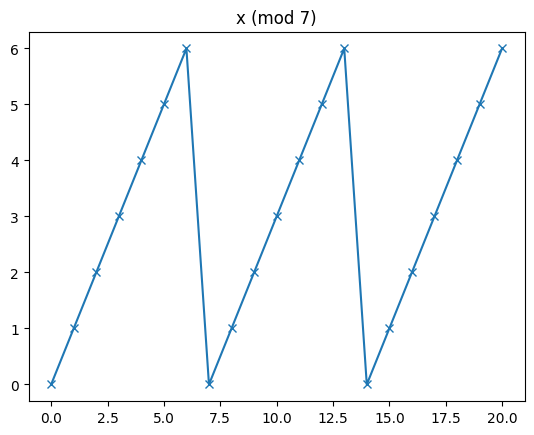

In [7]:
xs = [x for x in range (21)]
ys = [x % 7 for x in range(21)] # x (mod 7)
plt.plot(xs, ys, marker='x')
plt.title('x (mod 7)')

### Greatest Common Divisor

1. The **greatest common divisor** (**gcd**) of two numbers $n$ and $m$, written $\text{gcd}(n, m)$, is the largest number $k$ such that $k | n$ and $k | m$.
2. The gcd can be computed in polynomial time.
3. Two numbers $n$ and $m$ are **relatively prime** if $\text{gcd}(n, m) = 1$.

In [8]:
math.gcd(10, 20)

10

In [9]:
math.gcd(3, 5)  # 3 and 5 are relatively prime

1

In [10]:
math.gcd(10, 21)  # 10 and 21 are relatively prime, but neither are prime

1

### Fermat's little theorem

**Fermat's little theorem** states that

$$
x^{p-1} \equiv 1 \, (\text{mod} \, p)
$$

for any prime $p$ and $1 \leq x \leq p - 1$.

In [11]:
# Example: Fermat's little theorem
x = 2; p = 7
acc = [x]
for i in range(2, 7):
    acc += [(acc[-1] * x) % p]
acc  # contains x^i (mod p) for 1 <= i <= p - 1

[2, 4, 1, 2, 4, 1]

#### Observation

Multiplication of numbers $\{ 1, \dots, p-1 \}$ mod $p$ is a permutation.

In [12]:
p = 7
print(f"Multiplication (mod {p})")
print("x\\y ", " ".join([str(y) for y in range(1, p)]))
for x in range(1, p):
    print(' ', x, [(x * y) % p for y in range(1, p)])

Multiplication (mod 7)
x\y  1 2 3 4 5 6
  1 [1, 2, 3, 4, 5, 6]
  2 [2, 4, 6, 1, 3, 5]
  3 [3, 6, 2, 5, 1, 4]
  4 [4, 1, 5, 2, 6, 3]
  5 [5, 3, 1, 6, 4, 2]
  6 [6, 5, 4, 3, 2, 1]


### Euler's totient function

**Euler's totient function** 

$$
\phi(N) = |\{ n : \text{gcd}(n, x) = 1, n \in \mathbb{N} \}|
$$

gives the number of naturals less than $N$ that are relatively prime to $N$.

In [13]:
def euler_totient(N):
    cnt = 0
    for i in range(N):
        if math.gcd(i, N) == 1:
           cnt += 1
    return cnt

In [14]:
euler_totient(9)

6

In [15]:
euler_totient(11*13), 10 * 12

(120, 120)

### Euler's theorem

**Euler's theorem** states that

$$
x^{(p-1)(q-1)} \equiv 1 \, (\text{mod} \, pq)
$$

for any distinct primes $p, q$ and $1 \leq x \leq (p - 1)(q - 1)$.

In [16]:
# Example: Euler's theorem
x = 2; p = 3; q = 5
acc = [x]
for i in range(2, (p-1)*(q-1)+1):
    acc += [(acc[-1] * x) % (p*q)]
acc  # contains x^i (mod p) for 1 <= i <= (p - 1)(q - 1)

[2, 4, 8, 1, 2, 4, 8, 1]

## Order Finding Problem

1. Let $a < N$ be relatively prime.
2. The **order** of $a$ is the smallest number $s$ such that

$$
a^s \equiv 1 \, (\text{mod} \, N)
$$

3. The **order finding problem** is to determine the order of some given $a$ and $N$.

### Example

Here is an example where we choose $a = 3$ and $N = 35$.

Text(0.5, 1.0, 'a=3 and N = 35')

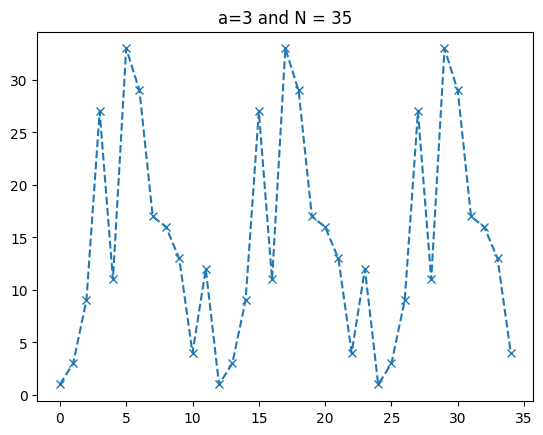

In [17]:
xs = [i for i in range(35)]
ys = [(3 ** x) % 35 for x in xs]
plt.plot(xs, ys, marker='x', linestyle='--')
plt.title("a=3 and N = 35")

In [18]:
# order is 12

### Aside: Period finding

A function $f: \mathbb{N} \rightarrow \mathbb{N}$ is **periodic** if there is **period** $s > 0$ such that

$$
f(x) = f(y) \iff s | (y - x)
$$

for every $x$ and $y$.

1. $s | (y - x)$ is notation for $s$ divides $y - x$.
2. The **period finding problem** is to determine the period $s$ given oracle access to $f$.
3. The period finding problem is a generalization of the order finding problem.

## Reducing Factoring to Order Finding

1. We don't need to solve the general case of factoring an arbitrary number.
2. Instead, we'll just focus on factoring a product of two primes, which is the setting of Shor's algorithm.

### Reducing factoring to order finding

Suppose we are trying to factor $N = pq$ for primes $p$ and $q$.

1. Pick a random r relatively prime to $N$ (which happens unless r is p or q).
2. Find the order $s$ of

$$
r^x \, (\text{mod} \, N) \,.
$$

- This means that $r^s \equiv 1 \, (\text{mod} \, N)$ since $r^0 \equiv 1 \, (\text{mod} \, N)$.
    - **Use a order finding algorithm to find s. We'll leave as a blackbox since we are reducing factoring to order finding.**
3. Suppose $s$ is even. Then
\begin{align}
0 \, (\text{mod} \, N) & = r^{s} - 1 \tag{definition of order} \\
& = (r^{s/2} - 1)(r^{s/2} + 1) \tag{Factoring}
\end{align}
    - Recall $r^{\phi(N)} \equiv 1 \, (\text{mod} \, N)$ by Euler's theorem.
    - Thus $s | \phi(N)$.
4. Suppose further that neither $(r^{s/2} - 1)$ nor $(r^{s/2} + 1)$ is a multiple of $N$. Then either $\text{gcd}(r^{s/2} - 1, N)$ or $\text{gcd}(r^{s/2} + 1, N)$ is a factor of $N$, which gives us $p$ and subsequently $q$.
5. If either condition 3 or 4 fail, goto 1. The probability that steps 3 and 4 succeed is greater than $1/2$. See Neilsen and Chuang Theorem A4.13.

### Example

Factor $N = 3 \cdot 5$.

In [19]:
N = 35   # number we are trying to factor

In [20]:
# Step 1
r = 17    # randomly choosen

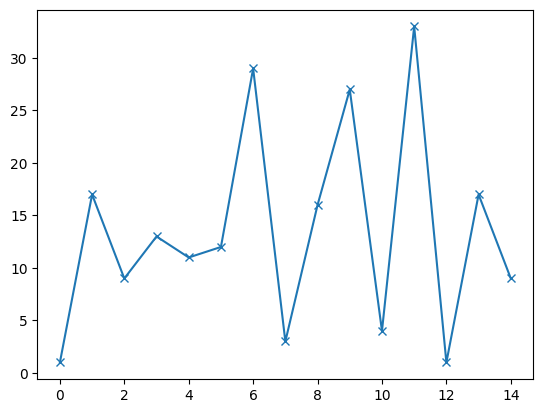

In [21]:
# Step 2: Order find somehow
xs = [x for x in range(15)]
ys = [(r ** x) % N for x in xs]
plt.plot(xs, ys, marker='x')

In [22]:
# Step 3: order find somehow
s = 12 # manual inspection
# s is even, so we can continue
left, right = int(r ** (s / 2) - 1), int(r ** (s / 2) + 1)
left, right

(24137568, 24137570)

In [23]:
# Step 4: Check the multiple condition
print("Left multiple of N", left % N == 0)
print("Right multiple of N", right % N == 0)
math.gcd(left, N), math.gcd(right, N)

Left multiple of N False
Right multiple of N False


(7, 5)

In [24]:
# Step 5: return the primes
math.gcd(left, N), N / math.gcd(left, N)

(7, 5.0)

### Putting it together

We can put the steps above together into an algorithm that reduces factoring to order finding.

In [25]:
def factor2_to_order(N: int, a: int, s: int) -> int:
    # Check that s is even
    if s % 2 != 0:
        print(s)
        return None
    
    guesses = [math.gcd(a**(s//2)-1, N), math.gcd(a**(s//2)+1, N)]
    for guess in guesses:
        # Check to see if guess is a factor
        if guess not in [1, N] and (N % guess) == 0:
            return guess